(1622, 2)
FEniCS plot


<Figure size 432x288 with 0 Axes>

Scatter plot
FEniCS plot - reassign


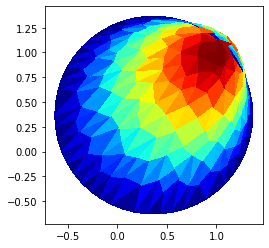

In [10]:
from dolfin import *                                                             
from mshr import *
import numpy as np                                                               
from mpl_toolkits.mplot3d import Axes3D                                          
import matplotlib.pyplot as plt
plt.jet()          

R = 1
N = 10
circle = Circle(Point(0., 0.), R, segments=5 * N)
domain = circle
mesh = generate_mesh(domain, N)
V = VectorFunctionSpace(mesh, "CG", 2)

n = V.dim()
d = mesh.geometry().dim()
dof_coordinates = V.tabulate_dof_coordinates()
print(dof_coordinates.shape)
dof_coordinates.resize((n, d))
dof_x = dof_coordinates[:, 0]
dof_y = dof_coordinates[:, 1]

# use FEniCS to get some data to plot                                            
out = Expression(("sin(pi*x[0]*x[1])", "sin(pi*x[0]*x[1])"), degree = 1)                                    
u = interpolate(out, V)
print("FEniCS plot")
fig = plt.figure()  
plot(u)
plt.close()

fig = plt.figure()  
plot(u, mode='displacement')
plt.close()
plt.show(block=False)

print("Scatter plot")
fig = plt.figure()                                                     
ax = fig.add_subplot(111, projection='3d')
# p= ax.scatter(dof_x, dof_y, u.vector().get_local(), c='b', marker='.') 

cs = np.arange(len(dof_x)) / len(dof_x)
p = ax.scatter(dof_x, dof_y, u.vector().get_local(), c=cs, marker=".") 
fig.colorbar(p)
plt.close()
plt.show(block=False)

print("FEniCS plot - reassign")
# now compute the data to be used by FEniCS
z = np.exp(-(dof_x**2 + dof_y**2))
u.vector()[:] = z                                                                
fig = plt.figure()
plot(u)
plt.close()

fig = plt.figure()
plt.close()
plot(u, mode='displacement')
plt.show(block=False)
